In [85]:
import pandas as pd
import numpy as np

In [86]:
companies = pd.read_csv("companies.csv",encoding= 'unicode_escape')
rounds2 = pd.read_csv("rounds2.csv",encoding= 'unicode_escape')

In [87]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [88]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [89]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [90]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [91]:
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: x.upper())
companies['permalink'] = companies['permalink'].apply(lambda x: x.upper())

In [92]:
# unique companies are present in rounds2

len(rounds2['company_permalink'].unique())

66370

In [93]:
# unique companies are present in companies

len(companies['permalink'].value_counts())

66368

In [94]:
master_frame = pd.merge(rounds2,companies,left_on='company_permalink',right_on='permalink',how='left')

In [95]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114942 non-null  object 
 7   name                     114941 non-null  object 
 8   homepage_url             108810 non-null  object 
 9   category_list            111535 non-null  object 
 10  status                   114942 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

In [96]:
master_frame.shape

(114949, 16)

In [97]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


### Data cleaning of master_frame.

In [98]:
# Remove the company where country code is not entered
master_frame = master_frame[~master_frame['country_code'].isnull()]

In [99]:
# Remove the company for which raised_amound_usd is not given or 0.
master_frame = master_frame[~master_frame['raised_amount_usd'].isnull()]
master_frame = master_frame[~(master_frame['raised_amount_usd'] == 0)]

In [100]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88729 entries, 0 to 114947
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        88729 non-null  object 
 1   funding_round_permalink  88729 non-null  object 
 2   funding_round_type       88729 non-null  object 
 3   funding_round_code       26924 non-null  object 
 4   funded_at                88729 non-null  object 
 5   raised_amount_usd        88729 non-null  float64
 6   permalink                88729 non-null  object 
 7   name                     88728 non-null  object 
 8   homepage_url             85420 non-null  object 
 9   category_list            88166 non-null  object 
 10  status                   88729 non-null  object 
 11  country_code             88729 non-null  object 
 12  state_code               86982 non-null  object 
 13  region                   87534 non-null  object 
 14  city                 

# Checkpoint 2: Funding Type Analysis

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [102]:
master_frame.funding_round_type.value_counts()

venture                  48084
seed                     21158
debt_financing            6510
angel                     4400
grant                     1977
private_equity            1834
undisclosed               1337
convertible_note          1303
equity_crowdfunding        956
post_ipo_equity            601
product_crowdfunding       329
post_ipo_debt              151
non_equity_assistance       60
secondary_market            29
Name: funding_round_type, dtype: int64

In [103]:
funding_types = ['venture','angel','seed','private_equity']
master_frame = master_frame[master_frame['funding_round_type'].isin(funding_types)]

In [104]:
round(master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending = False),2)

funding_round_type
private_equity    73658704.60
venture           11742369.78
angel               974503.35
seed                750756.35
Name: raised_amount_usd, dtype: float64

In [105]:
#plot_1 shows the representative amount of investment in each funding type.
#This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds. 
plot_1 = master_frame

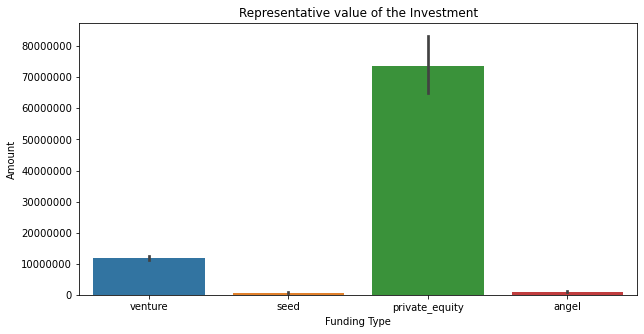

In [106]:
plt.figure(figsize=(10,5))
sns.barplot(data=plot_1, x="funding_round_type", y="raised_amount_usd", estimator=np.mean)
plt.title("Representative value of the Investment")
plt.xlabel("Funding Type")
plt.ylabel("Amount")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

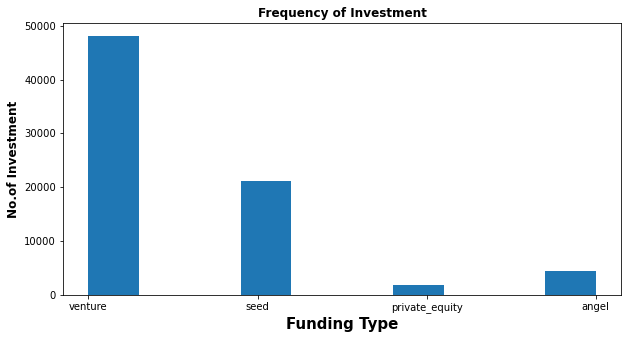

In [107]:
plt.figure(figsize=(10,5))
plt.hist(master_frame['funding_round_type'])
plt.title("Frequency of Investment",fontweight ='bold',fontsize = 12)
plt.xlabel("Funding Type",fontweight ='bold',fontsize = 15)
plt.ylabel("No.of Investment",fontweight ='bold',fontsize = 12)
plt.show()

In [108]:
#dataset with venture as investment type.
master_frame = master_frame[master_frame['funding_round_type'] == "venture"]

In [109]:
master_frame.shape

(48084, 16)

# Checkpoint 3: Country Analysis

In [110]:
#top nine countries which have received the highest total funding
top9_countries=master_frame.groupby('country_code')['raised_amount_usd'].sum().nlargest(9)

In [111]:
top9_countries

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

In [112]:
# plot_2 shows the top 9 countries against the total amount of investments of funding type "Venture".
plot_2 = top9_countries

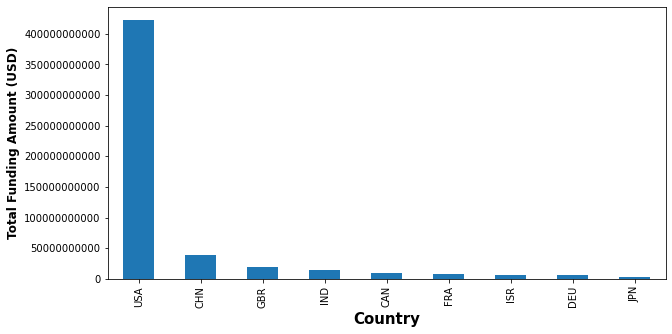

In [113]:
plt.figure(figsize=(10,5))
plot_2.plot(kind='bar')
plt.xlabel("Country",fontweight ='bold',fontsize = 15)
plt.ylabel("Total Funding Amount (USD)",fontweight ='bold',fontsize = 12)
plt.ticklabel_format(style='plain', axis='y')

In [114]:
countries =['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN']
top9 = master_frame[master_frame['country_code'].isin(countries)]

In [115]:
top9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44359 entries, 0 to 114941
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        44359 non-null  object 
 1   funding_round_permalink  44359 non-null  object 
 2   funding_round_type       44359 non-null  object 
 3   funding_round_code       24772 non-null  object 
 4   funded_at                44359 non-null  object 
 5   raised_amount_usd        44359 non-null  float64
 6   permalink                44359 non-null  object 
 7   name                     44359 non-null  object 
 8   homepage_url             42289 non-null  object 
 9   category_list            44098 non-null  object 
 10  status                   44359 non-null  object 
 11  country_code             44359 non-null  object 
 12  state_code               44072 non-null  object 
 13  region                   43910 non-null  object 
 14  city                 

# Checkpoint 4: Sector Analysis

In [116]:
#Remove company which don;t have category_list
top9 = top9[~(top9['category_list'].isnull())]

In [117]:
# create Primary sector of each company
top9['primary_sector'] = top9['category_list'].str.split('|').str[0]

In [118]:
top9['primary_sector'].value_counts()

Biotechnology            6411
Software                 3857
Advertising              2058
Health Care              1738
Enterprise Software      1686
                         ... 
Mobile Software Tools       1
Watch                       1
Solar                       1
Limousines                  1
Rapidly Expanding           1
Name: primary_sector, Length: 587, dtype: int64

In [119]:
#mapping file
mapping = pd.read_csv('mapping.csv')


In [120]:
#At many places in the category_list column the 'na' is misprinded as '0'
#Eg. 'Analysis' is present as 'A0lysis
mapping.category_list = mapping.category_list.replace({'0':'na'}, regex=True)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [121]:
#Drop Row 0 and Blank column
mapping=mapping.drop(0,axis=0)
mapping = mapping.drop("Blanks",axis=1)

In [122]:
# create Main sector of every category 
mapping['main_sector'] =" "
for row in mapping.index:
    if mapping['Automotive & Sports'][row] == 1:
        mapping['main_sector'][row] = "Automotive & Sports"
    elif mapping['Cleantech / Semiconductors'][row] == 1:
        mapping['main_sector'][row] = "Cleantech / Semiconductors"
    elif mapping['Entertainment'][row] == 1:
        mapping['main_sector'][row] = "Entertainment"
    elif mapping['Health'][row] == 1:
        mapping['main_sector'][row] = "Health"
    elif mapping['Manufacturing'][row] == 1:
        mapping['main_sector'][row] = "Manufacturing"
    elif mapping['News, Search and Messaging'][row] == 1:
        mapping['main_sector'][row] = "News, Search and Messaging"
    elif mapping['Others'][row] == 1:
        mapping['main_sector'][row] = "Others"
    elif mapping['Social, Finance, Analytics, Advertising'][row] == 1:
        mapping['main_sector'][row] = "Social, Finance, Analytics, Advertising"
    else:
        mapping['main_sector'][row] = "Junk Value"

In [123]:
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
1,3D,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,0,0,0,1,0,0,0,0,Health


In [124]:
# Map each primary sector to one of the eight main sectors
top9['main_sector']= top9['primary_sector'].map(mapping.set_index('category_list')['main_sector'])

In [125]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web,"News, Search and Messaging"
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology,Cleantech / Semiconductors
10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,"Social, Finance, Analytics, Advertising"
11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,"Social, Finance, Analytics, Advertising"


# Checkpoint 5: Sector Analysis 2

In [126]:
# Remove company which don't have main sector
top9 = top9[~(top9['main_sector'].isnull())]

In [127]:
top9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43923 entries, 0 to 114941
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        43923 non-null  object 
 1   funding_round_permalink  43923 non-null  object 
 2   funding_round_type       43923 non-null  object 
 3   funding_round_code       24542 non-null  object 
 4   funded_at                43923 non-null  object 
 5   raised_amount_usd        43923 non-null  float64
 6   permalink                43923 non-null  object 
 7   name                     43923 non-null  object 
 8   homepage_url             41930 non-null  object 
 9   category_list            43923 non-null  object 
 10  status                   43923 non-null  object 
 11  country_code             43923 non-null  object 
 12  state_code               43639 non-null  object 
 13  region                   43478 non-null  object 
 14  city                 

## USA

In [128]:

D1=top9[top9['country_code']=='USA']

In [129]:
D1 = D1[(D1['raised_amount_usd'] >= 5000000) & (D1['raised_amount_usd'] <= 15000000)]

In [130]:
D1['raised_amount_usd'].sum()

107318294664.0

In [131]:
D1['raised_amount_usd'].count()

12012

In [132]:
D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
News, Search and Messaging                 1582
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [133]:
D1_topSector=D1.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending = False)

In [134]:
D1_topSector

main_sector
Others                                     2.632101e+10
Social, Finance, Analytics, Advertising    2.380738e+10
Cleantech / Semiconductors                 2.120663e+10
News, Search and Messaging                 1.395957e+10
Health                                     8.211859e+09
Manufacturing                              7.258553e+09
Entertainment                              5.099198e+09
Automotive & Sports                        1.454104e+09
Name: raised_amount_usd, dtype: float64

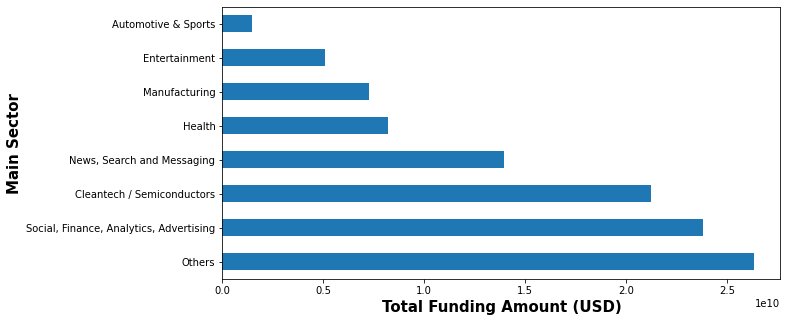

In [135]:
plt.figure(figsize=(10,5))
D1_topSector.plot(kind='barh')
plt.xlabel("Total Funding Amount (USD)", fontweight ='bold',fontsize = 15)
plt.ylabel("Main Sector", fontweight ='bold', fontsize = 15)
plt.show()

In [136]:
# company received the highest investment in "Others" sector
D1[D1['main_sector']=='Others'].groupby(['permalink']).raised_amount_usd.sum().nlargest(5)

permalink
/ORGANIZATION/VIRTUSTREAM            64300000.0
/ORGANIZATION/CAPELLA                54968051.0
/ORGANIZATION/AIRTIGHT-NETWORKS      54201907.0
/ORGANIZATION/DECARTA                52100000.0
/ORGANIZATION/BLACK-DUCK-SOFTWARE    51000000.0
Name: raised_amount_usd, dtype: float64

In [137]:
# company received the highest investment in "Cleantech / Semiconductors" sector
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['permalink']).raised_amount_usd.sum().nlargest(5)

permalink
/ORGANIZATION/SHOTSPOTTER    67933006.0
/ORGANIZATION/DEMANDBASE     63000000.0
/ORGANIZATION/INTACCT        61800000.0
/ORGANIZATION/NETBASE        60600000.0
/ORGANIZATION/LOTAME         59700000.0
Name: raised_amount_usd, dtype: float64

## GBR

In [138]:
D2=top9[top9['country_code']=='GBR']

In [139]:
D2 = D2[(D2['raised_amount_usd'] >= 5000000) & (D2['raised_amount_usd'] <= 15000000)]

In [140]:
D2['raised_amount_usd'].sum()

5365228300.0

In [141]:
D2['raised_amount_usd'].count()

619

In [142]:
D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [143]:
D2_topSector = D2.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending = False)

In [144]:
D2_topSector

main_sector
Others                                     1.283624e+09
Cleantech / Semiconductors                 1.150140e+09
Social, Finance, Analytics, Advertising    1.089404e+09
News, Search and Messaging                 6.157462e+08
Entertainment                              4.827847e+08
Manufacturing                              3.619403e+08
Health                                     2.145375e+08
Automotive & Sports                        1.670516e+08
Name: raised_amount_usd, dtype: float64

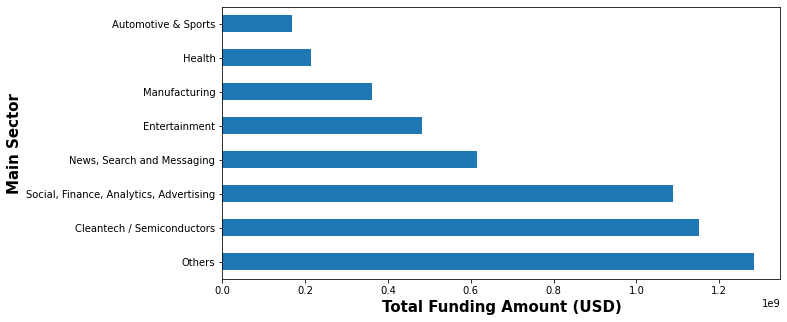

In [145]:
plt.figure(figsize=(10,5))
D2_topSector.plot(kind='barh')
plt.xlabel("Total Funding Amount (USD)", fontweight ='bold',fontsize = 15)
plt.ylabel("Main Sector", fontweight ='bold', fontsize = 15)
plt.show()

In [146]:
# company received the highest investment in "Others" sector
D2[D2['main_sector']=='Others'].groupby(['permalink']).raised_amount_usd.sum().nlargest(5)

permalink
/ORGANIZATION/ELECTRIC-CLOUD             37000000.0
/ORGANIZATION/SENSAGE                    36250000.0
/ORGANIZATION/ENIGMATIC                  32500000.0
/ORGANIZATION/SILVERRAIL-TECHNOLOGIES    29000000.0
/ORGANIZATION/OPENCLOUD                  27972766.0
Name: raised_amount_usd, dtype: float64

In [147]:
# company received the highest investment in "Cleantech / Semiconductors" sector
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['permalink']).raised_amount_usd.sum().nlargest(5)

permalink
/ORGANIZATION/CELLTICK-TECHNOLOGIES    37500000.0
/ORGANIZATION/MYTHINGS                 34000000.0
/ORGANIZATION/ZOPA                     32900000.0
/ORGANIZATION/IMAGINI                  28550000.0
/ORGANIZATION/MARKETINVOICE            25553007.0
Name: raised_amount_usd, dtype: float64

## IND

In [148]:
D3=top9[top9['country_code']=='IND']


In [149]:
D3 = D3[(D3['raised_amount_usd'] >= 5000000) & (D3['raised_amount_usd'] <= 15000000)]

In [150]:
D3['raised_amount_usd'].sum()

2949543602.0

In [151]:
D3['raised_amount_usd'].count()

328

In [152]:
D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [153]:
D3_topSector = D3.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending = False)

In [154]:
D3_topSector

main_sector
Others                                     1.013410e+09
Social, Finance, Analytics, Advertising    5.505496e+08
News, Search and Messaging                 4.338345e+08
Entertainment                              2.808300e+08
Manufacturing                              2.009000e+08
Health                                     1.677400e+08
Cleantech / Semiconductors                 1.653800e+08
Automotive & Sports                        1.369000e+08
Name: raised_amount_usd, dtype: float64

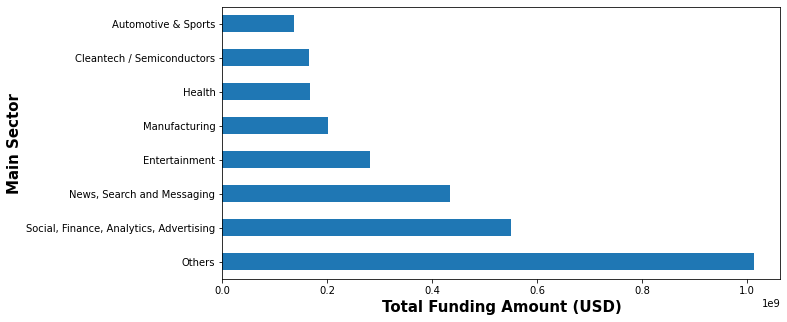

In [155]:
plt.figure(figsize=(10,5))
D3_topSector.plot(kind='barh')
plt.xlabel("Total Funding Amount (USD)", fontweight ='bold',fontsize = 15)
plt.ylabel("Main Sector", fontweight ='bold', fontsize = 15)
plt.show()

In [156]:
# company received the highest investment in "Others" sector
D3[D3['main_sector']=='Others'].groupby(['permalink']).raised_amount_usd.sum().nlargest(5)

permalink
/ORGANIZATION/FIRSTCRY-COM        39000000.0
/ORGANIZATION/MYNTRA              38000000.0
/ORGANIZATION/COMMONFLOOR         32900000.0
/ORGANIZATION/PEPPERFRY-COM       28000000.0
/ORGANIZATION/ITZCASH-CARD-LTD    25000000.0
Name: raised_amount_usd, dtype: float64

In [157]:
# company received the highest investment in "News, Search and Messaging" sector
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['permalink']).raised_amount_usd.sum().nlargest(5)

permalink
/ORGANIZATION/MANTHAN-SYSTEMS               50700000.0
/ORGANIZATION/KOMLI-MEDIA                   28000000.0
/ORGANIZATION/SHOPCLUES-COM                 25000000.0
/ORGANIZATION/INTARVO                       21900000.0
/ORGANIZATION/GRAMEEN-FINANCIAL-SERVICES    21556050.0
Name: raised_amount_usd, dtype: float64

# Checkpoint 6: Plots

In [158]:
# A plot showing the representative amount of investment in each funding type.
# This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   

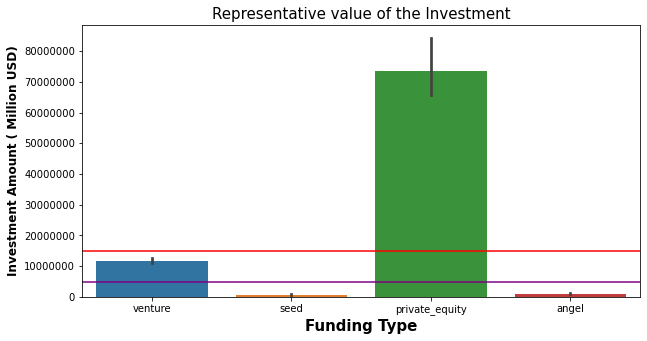

In [159]:
plt.figure(figsize=(10,5))
sns.barplot(data=plot_1, x="funding_round_type", y="raised_amount_usd", estimator=np.mean)
plt.title("Representative value of the Investment", fontsize = 15)
plt.xlabel("Funding Type", fontweight ='bold',fontsize = 15)
plt.ylabel("Investment Amount ( Million USD)",fontweight ='bold',fontsize = 12)
plt.ticklabel_format(style='plain', axis='y')
plt.axhline(5000000, color='purple')
plt.axhline(15000000, color='red')
plt.show()

In [160]:
#A plot showing the top 9 countries against the total amount of investments of funding type FT.
#This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.  

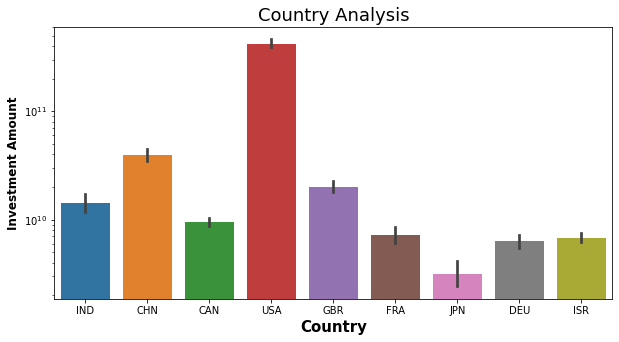

In [161]:
plt.figure(figsize=(10,5))
c=sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=np.sum)
c.set_yscale('log')
c.set_title('Country Analysis',fontsize =18)
plt.xlabel("Country", fontweight ='bold',fontsize = 15)
plt.ylabel("Investment Amount",fontweight ='bold',fontsize = 12)
plt.show()


In [162]:
#A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart.
#This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [163]:
master_dataframe=D1[D1['main_sector'].
                               isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])]

In [164]:
master_dataframe=master_dataframe.append(D2[D2['main_sector'].
                              isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])])

In [165]:
master_dataframe=master_dataframe.append(D3[D3['main_sector'].
                              isin(['Others','News, Search and Messaging','Social, Finance, Analytics, Advertising'])])

In [166]:
master_dataframe.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
12,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,"Social, Finance, Analytics, Advertising"
103,/ORGANIZATION/128-TECHNOLOGY,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,/ORGANIZATION/128-TECHNOLOGY,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,Service Providers,Others
134,/ORGANIZATION/170-SYSTEMS,/funding-round/b84bb882ca873f5fb96535671981196d,venture,A,16-04-2002,14000000.0,/ORGANIZATION/170-SYSTEMS,170 Systems,http://www.170systems.com,Software,acquired,USA,MA,Boston,Bedford,01-01-1990,Software,Others
140,/ORGANIZATION/17ZUOYE,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,A,01-01-2011,5000000.0,/ORGANIZATION/17ZUOYE,17zuoye,http://www.17zuoye.com/,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,01-01-2007,Education,Others
141,/ORGANIZATION/17ZUOYE,/funding-round/8d87f771e938e0f31641bd600abbafca,venture,B,01-09-2013,10000000.0,/ORGANIZATION/17ZUOYE,17zuoye,http://www.17zuoye.com/,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,01-01-2007,Education,Others


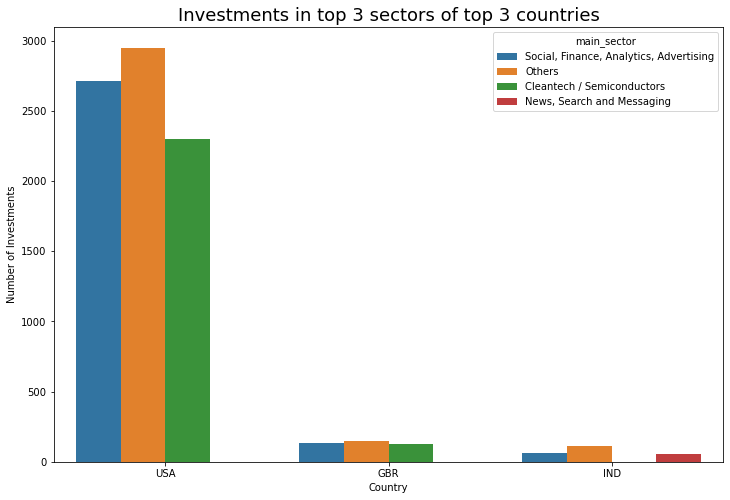

In [167]:
plt.figure(figsize=(12, 8))
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=master_dataframe, estimator=lambda x:len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in top 3 sectors of top 3 countries',fontsize =18)
plt.show()